In [1]:
%pylab inline
import emcee

Populating the interactive namespace from numpy and matplotlib


## I'm runing the example: https://emcee.readthedocs.io/en/stable/tutorials/quickstart/

## another interesting tutorial and theory in https://prappleizer.github.io/Tutorials/MCMC/MCMC_Tutorial_Solution.html

In [2]:
def log_prob(x, mu, cov):
    diff = x - mu
    return -0.5 * np.dot(diff, np.linalg.solve(cov, diff))

In [3]:
ndim = 5

np.random.seed(42)
means = np.random.rand(ndim)

cov = 0.5 - np.random.rand(ndim**2).reshape((ndim, ndim))
cov = np.triu(cov)
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov, cov)

In [7]:
nwalkers = 32
p0 = np.random.rand(nwalkers, ndim)

In [8]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[means, cov])

In [13]:
state = sampler.run_mcmc(p0, 100)
sampler.reset()

In [24]:
sampler.run_mcmc(state, 10000);

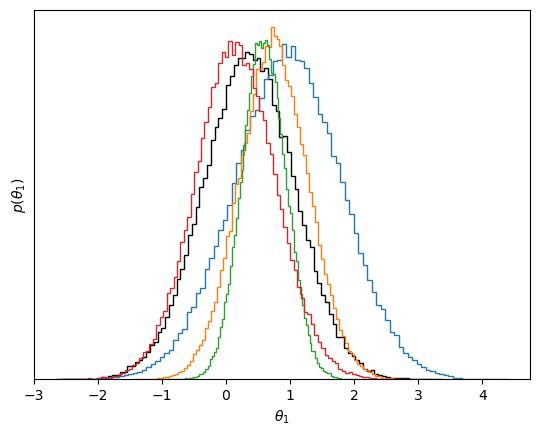

In [27]:
samples = sampler.get_chain(flat=True)
plt.hist(samples[:, 0], 100, color="k", histtype="step")
plt.hist(samples[:, 1], 100, histtype="step")
plt.hist(samples[:, 2], 100, histtype="step")
plt.hist(samples[:, 3], 100, histtype="step")
plt.hist(samples[:, 4], 100, histtype="step")
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$p(\theta_1)$")
plt.gca().set_yticks([]);

In [30]:
print('reales:',means)
for i in range(5):
    print('estimado:',np.mean(samples[:, i]))

reales: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
estimado: 0.35690690355854304
estimado: 0.9549770574913169
estimado: 0.7418571893708384
estimado: 0.5916893323423663
estimado: 0.14849015738849972


## Second example

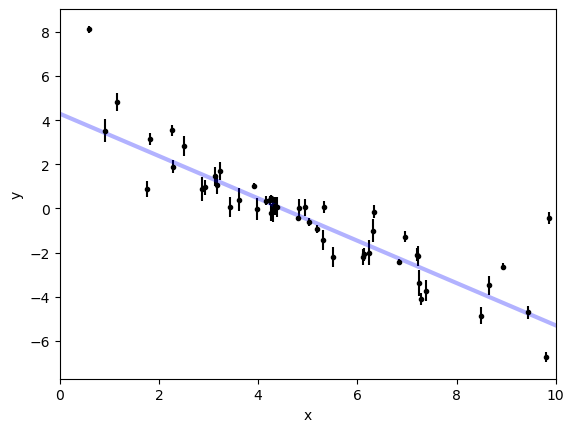

In [33]:
np.random.seed(123)

# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534

# Generate some synthetic data from the model.
N = 50
x = np.sort(10 * np.random.rand(N))
yerr = 0.1 + 0.5 * np.random.rand(N)
y = m_true * x + b_true
y += np.abs(f_true * y) * np.random.randn(N)
y += yerr * np.random.randn(N)

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
x0 = np.linspace(0, 10, 500)
plt.plot(x0, m_true * x0 + b_true, "b", alpha=0.3, lw=3)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

In [34]:
def log_likelihood(theta, x, y, yerr):
    m, b, log_f = theta
    model = m * x + b
    sigma2 = yerr**2 + model**2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

Maximum likelihood estimates:
m = -1.003
b = 4.528
f = 0.454


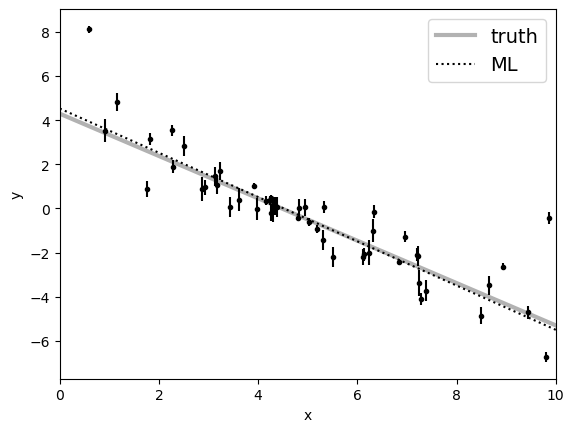

In [40]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([m_true, b_true, np.log(f_true)]) + 0.1 * np.random.randn(3)
soln = minimize(nll, initial, args=(x, y, yerr))
m_ml, b_ml, log_f_ml = soln.x

print("Maximum likelihood estimates:")
print("m = {0:.3f}".format(m_ml))
print("b = {0:.3f}".format(b_ml))
print("f = {0:.3f}".format(np.exp(log_f_ml)))

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
#plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
plt.plot(x0, np.dot(np.vander(x0, 2), [m_ml, b_ml]), ":k", label="ML")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");